In [1]:
import pandas as pd
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read pre-processed data
data = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/preprocessed_twitter_2019_2020_pandemi.csv')

In [4]:
print(data)

       Unnamed: 0                                              tweet  \
0               0  🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...   
1               1  第一商品金地金参考価格(1kg税込) 8:45現在 販売 6,578,000円 買取 6,5...   
2               2  🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...   
3               3  🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...   
4               4  gbpusd gbpchf us100 nasdac gbpnzd gbpcad us30 ...   
...           ...                                                ...   
95008       95008  seventeen "heng:garae" teaser images 30 dk ❤️ ...   
95009       95009  seventeen "heng:garae" teaser images 29 dk ❤️ ...   
95010       95010  seventeen "heng:garae" teaser images 28 woozi ...   
95011       95011  seventeen "heng:garae" teaser images 27 woozi ...   
95012       95012  seventeen "heng:garae" teaser images 26 woozi ...   

       Subjectivity  Polarity  Analysis  
0          0.366667  0.158333  Positive  
1          0.000000  0.000000   Neutral  
2        

In [5]:
# getting labels from pre-processed dataset
label = data.iloc[:, -1:].values
print(label)

[['Positive']
 ['Neutral']
 ['Positive']
 ...
 ['Positive']
 ['Positive']
 ['Positive']]


In [6]:
# data.iloc[:,:-1] get all the columns except label column - for the X_train
X_train, X_test, y_train, y_test = train_test_split (data['tweet'], label, test_size=0.2, random_state=0)

In [7]:
# label encoder
Encoder = LabelEncoder()
print(y_train[:10])

y_train = Encoder.fit_transform(y_train)
print(y_train[:10])

y_test = Encoder.fit_transform(y_test)

[['Neutral']
 ['Neutral']
 ['Neutral']
 ['Neutral']
 ['Positive']
 ['Neutral']
 ['Neutral']
 ['Neutral']
 ['Positive']
 ['Positive']]
[1 1 1 1 2 1 1 1 2 2]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.
# more info: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = LinearSVC()

# train
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [10]:
# predict the labels on validation dataset
predictions_SVM = svc.predict(X_test_tfidf)

In [11]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.99936852075988


### 2. Learning Curve

In [12]:
train_sizes, train_scores, test_scores = learning_curve(LinearSVC(), X_train_tfidf, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

[learning_curve] Training set sizes: [  684  2066  3448  4830  6212  7594  8976 10359 11741 13123 14505 15887
 17269 18651 20034 21416 22798 24180 25562 26944 28326 29709 31091 32473
 33855 35237 36619 38001 39384 40766 42148 43530 44912 46294 47676 49059
 50441 51823 53205 54587 55969 57351 58734 60116 61498 62880 64262 65644
 67026 68409]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.0min finished


In [13]:
# getting mean values of training score
train_mean = np.mean(train_scores, axis=1)
train_mean

array([1.        , 0.99956438, 0.99973898, 0.99962733, 0.99971024,
       0.99976297, 0.99988859, 0.99990347, 0.99989779, 0.9998476 ,
       0.99986212, 0.99992447, 0.99993051, 0.99993566, 0.99990516,
       0.99991128, 0.99991666, 0.99992142, 0.99992958, 0.99993319,
       0.99993645, 0.99993941, 0.99994211, 0.99994457, 0.99994683,
       0.99994892, 0.99993719, 0.99993948, 0.9999416 , 0.99994358,
       0.99994543, 0.99995635, 0.99994879, 0.99994816, 0.99995176,
       0.99995312, 0.99995837, 0.99995948, 0.99996053, 0.99996153,
       0.99996248, 0.99996338, 0.99996254, 0.9999634 , 0.99996748,
       0.99996819, 0.99996888, 0.99996953, 0.99997016, 0.99997076])

In [14]:
train_std = np.std(train_scores, axis=1)

In [15]:
test_mean = np.mean(test_scores, axis=1)

In [16]:
#standard dev.
test_std = np.std(test_scores, axis=1)

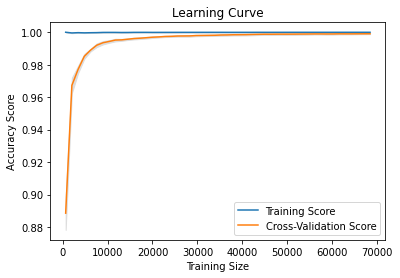

In [17]:
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

### 2. Model Evaluation
>**TN / True Negative:** the case was negative and predicted negative<br>
**TP / True Positive:** the case was positive and predicted positive<br>
**FN / False Negative:** the case was positive but predicted negative<br>
**FP / False Positive:** the case was negative but predicted positive<br>

#### 2.1. Accuracy

In [18]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.99936852075988


#### 2.2. F-Measure
>**What percent of positive predictions were correct?**<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [19]:
print(f1_score(y_test, predictions_SVM, average="macro"))

0.9992305551569274


#### 2.3. Precision
>**Accuracy of positive predictions.**<br>
Precision = TP/(TP + FP)

In [20]:
print(precision_score(y_test, predictions_SVM, average="macro"))

0.9991251316122339


#### 2.4. Recall
>**What percent of the positive cases did you catch?**<br>
Recall = TP/(TP+FN)



In [21]:
print(recall_score(y_test, predictions_SVM, average="macro")) 

0.999336058117675


#### 2.5. AUC (Area Under Curve)
>*AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.<br>
A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.*

>We have three classes in the dataset. Therefore, we will calculate ROC value for all classes.<br>
**Labels are expressed in binary format with one-hot encoding.**<br>
***ROC Curve is obtained as much as the number of classes.***

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


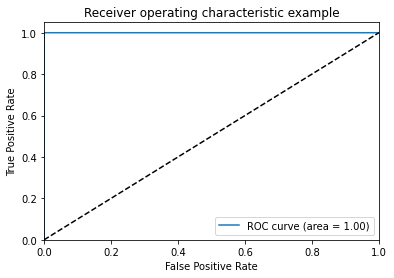

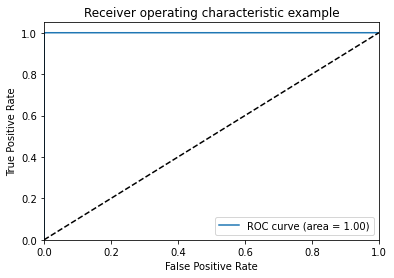

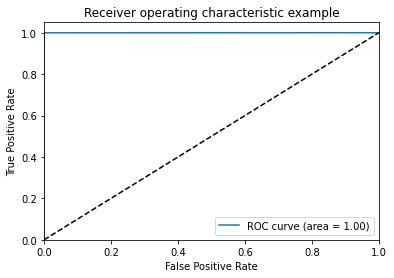

In [22]:
X, y = data['tweet'], label

y = Encoder.fit_transform(y)

y = preprocessing.label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))

# classifier
clf = OneVsRestClassifier(LinearSVC())

# train
y_score = clf.fit(X_train_tfidf, y_train).decision_function(X_test_tfidf)

# predict the labels on validation dataset
#predictions_SVM = clf.predict(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()